In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

### ~ Работа со встроенным набором данных в scikit-learn

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Данные о недвижимости

In [4]:
data = boston['data']

In [5]:
data.shape

(506, 13)

Target - величина которую нужно предсказать

In [6]:
target = boston['target']

In [7]:
feature_names = boston.feature_names

In [8]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Описание датасета

In [9]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Создание двух датафреймов

In [10]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.shape

(506, 13)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


### ~ Разбиение модели на тренировочный и тестовый датасеты

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### ~ Построение модели линейной регрессии

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

Задача линейной регрессии найти подходящие коэффициенты w\
при признаках x для вычисления целевой переменной y,\
минимизируя ошибку e:

y = w0 + w1 * x1 + w2 * x2 + ... wm * xm + e

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [22]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


### ~ Метрика оценки качества регрессионных моделей

Средняя квадратичная ошибка

In [23]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [24]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


In [25]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

22.098694827098043

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098036

Средняя абсолютная ошибка

In [28]:
(np.abs(check_test['error'])).mean()

3.060939595437035

$R^2$

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, y_pred)

0.6844267283527123

### ~ Просмотр коэффициентов линейной регрессии

w0

In [31]:
lr.intercept_

array([29.83642016])

In [32]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [33]:
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [35]:
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

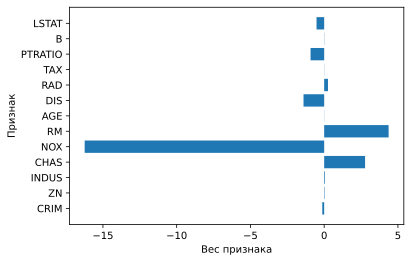

In [36]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [37]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### Визуализация влияния коэффициентов

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

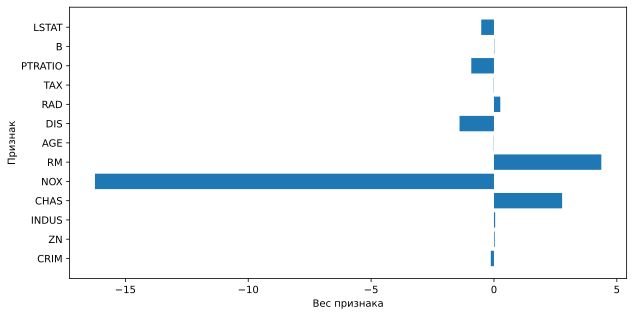

In [39]:
plt.figure(figsize=(10, 5))
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

### ~ Стандартизация признаков

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

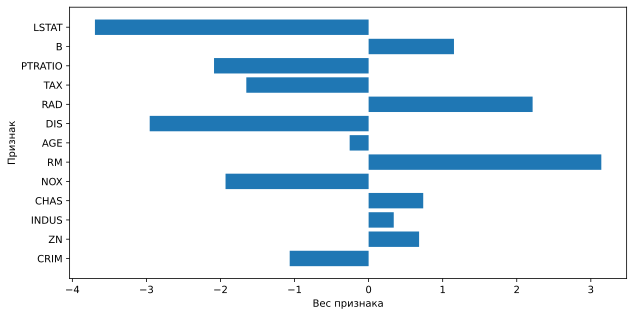

In [43]:
lr.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 5))
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [46]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > .5
]

important_features

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [52]:
lr.fit(X_train_scaled.loc[:, important_features], y_train)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)
print(f'before: {initial_mse}')
print(f'after: {mse2}')

before: 22.098694827098036
after: 24.846885663430903


### ~ Модели линейной регрессии с регуляризацией

In [53]:
from sklearn.linear_model import Lasso, Ridge

#### Lasso

In [77]:
model = Lasso(alpha=0.03)
model.fit(X_train_scaled.loc[:, important_features], y_train)
y_pred = model.predict(X_test_scaled.loc[:, important_features])
mean_squared_error(y_test, y_pred)

25.019739668235605

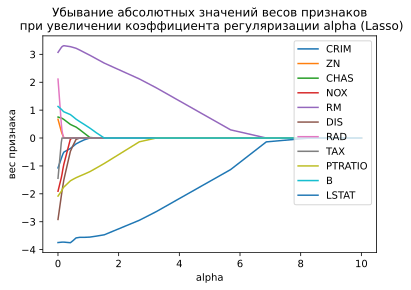

In [76]:
n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-3, 1, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('вес признака')
plt.legend(important_features)
plt.show()

#### Ridge

In [78]:
model = Ridge(alpha=0.03)
model.fit(X_train_scaled.loc[:, important_features], y_train)
y_pred = model.predict(X_test_scaled.loc[:, important_features])
mean_squared_error(y_test, y_pred)

24.847185982078575

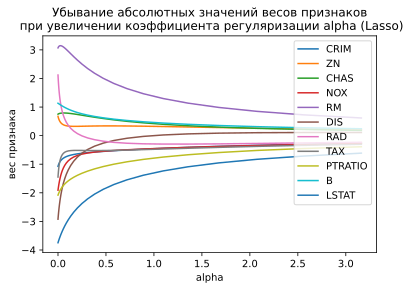

In [89]:
n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-4, 0.5, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val * 1000)
    ridge.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = ridge.coef_.flatten()
    
for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('вес признака')
plt.legend(important_features)
plt.show()

### ~ Логичесткая регрессия